$$a_{\text{fast}}^{2}={\frac {1}{2}}\left[\left(c_{s}^{2}+V_{A}^{2}\right)+{\sqrt {\left(c_{s}^{2}+V_{A}^{2}\right)^{2}-4c_{s}^{2}V_{A}^{2}\cos ^{2}\theta _{Bn}}}\,\right]\newline
c_s^2 = \gamma k T_e/m_i = \gamma Z T_e/\mu
$$

In [2]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
from transform import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

In [3]:
## pull data

b1_path = 'data/MS/FLD/part_b1/'
b2_path = 'data/MS/FLD/part_b2/'
b3_path = 'data/MS/FLD/part_b3/'


b1= get_osiris_quantity_1d(b1_path)
b1_0 = vysxd_get_data(f'{b1_path}part_b1-000000.h5') ##can use this for easy labeling

b2 = get_osiris_quantity_1d(b2_path)
b2_0 = vysxd_get_data(f'{b2_path}part_b2-000000.h5')

b3 = get_osiris_quantity_1d(b3_path)
b3_0 = vysxd_get_data(f'{b3_path}part_b3-000000.h5')


e1_path = 'data/MS/FLD/part_e1/'
e2_path = 'data/MS/FLD/part_e2/'
e3_path = 'data/MS/FLD/part_e3/'

e1 = get_osiris_quantity_1d(e1_path)
e1_0 = vysxd_get_data(f'{e1_path}part_e1-000000.h5') ##can use this for easy labeling

e2 = get_osiris_quantity_1d(e2_path)
e2_0 = vysxd_get_data(f'{e2_path}part_e2-000000.h5')

e3 = get_osiris_quantity_1d(e3_path)
e3_0 = vysxd_get_data(f'{e3_path}part_e3-000000.h5')

e_density = get_osiris_quantity_1d('data/MS/DENSITY/electrons/charge/')
e_density_0 = vysxd_get_data('data/MS/DENSITY/electrons/charge/charge-electrons-000000.h5')

p_density = get_osiris_quantity_1d('data/MS/DENSITY/positrons/charge/')
p_density_0 = vysxd_get_data('data/MS/DENSITY/positrons/charge/charge-positrons-000000.h5')

e_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl1/')
e_ufl1_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl1/ufl1-electrons-000000.h5')

# Useful to keep these as global variables
dt, dx, t, x = e1[1], e1[2], e1[3], e1[4]

xmin = 5; xmax = 60; tmin = 500;tmax =600; v=.105; sf_index=400

In [4]:
# write_quantities can be used to integrate shit and then leave it as .npy files that we can load very easily
# note that quantity_ indicates an averaged quantity... I don't know if there is a better practice

e_density_, _ = np.load("avg_q/e_density.npy")
p_density_, _ = np.load("avg_q/p_density.npy")

e1_, _ = np.load("avg_q/e1.npy")
e2_, _ = np.load("avg_q/e2.npy")
e3_, _ = np.load("avg_q/e3.npy")

b1_, _ = np.load("avg_q/b1.npy")
b2_, _ = np.load("avg_q/b2.npy")
b3_, _ = np.load("avg_q/b3.npy")

e_ufl1_, _ = np.load("avg_q/e_ufl1.npy")
e_ufl2_, _ = np.load("avg_q/e_ufl2.npy")
e_ufl3_, _ = np.load("avg_q/e_ufl3.npy")

p_ufl1_, _ = np.load("avg_q/p_ufl1.npy")

e_temperature_, _ = np.load("avg_q/e_temp.npy")

shock mach number is approximately 5.82


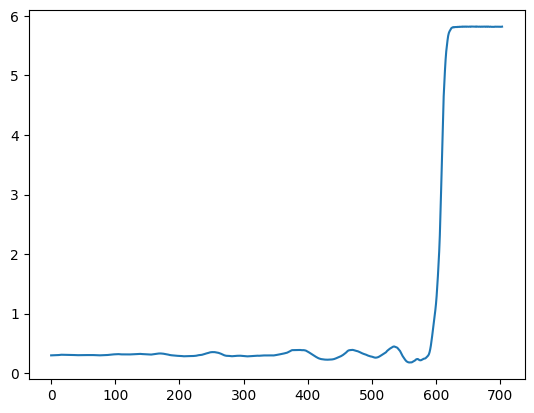

In [101]:
m_i = 1
gamma = 2
theta = np.pi/2
v = .105

# Va_squared = (b1_**2+b2_**2+b3_**2)/(-1*e_density_+m_i*p_density_)
Va_squared = 0
cs_squared = gamma*e_temperature_/m_i
# cs_squared = 0

magnetosonic =np.sqrt((1/2)*((cs_squared+Va_squared)+np.sqrt((cs_squared+Va_squared)**2-4*cs_squared*Va_squared*(np.cos(theta))**2)))

plt.plot((v-e_ufl1_)/magnetosonic)

mach_number = round(((v-e_ufl1_)/magnetosonic)[-1],2)

print(f"shock mach number is approximately {mach_number}")

In [102]:
def pretty_plot():
    plt.grid(visible=True,which='major',lw=.75)
    plt.grid(visible=True,which='minor',ls= ':',lw=.5)
    plt.minorticks_on()

In [109]:
import sympy
gamma = 2
beta = 2*4*np.pi*e_temperature_[-1]/(0.04**2) # missing a mu_0 in denom
r = sympy.symbols('r')
roots = sympy.solve(2*(2-gamma)*r**2 + gamma*r*(2*(1+beta)+(gamma-1)*beta*mach_number**2) - gamma*(gamma+1)*beta*mach_number**2, r)

R = 1 + gamma * mach_number**2*(1-roots[0]**(-1)) + beta**(-1)*(1-roots[0]**2)

In [110]:
float(R)

44.436284227371324

predicted downstream mass density is 5.74576135073287


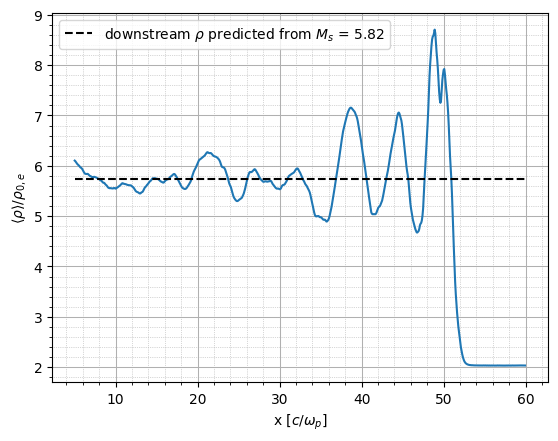

In [111]:
# rho_d = ((gamma+1)*(-1*e_density_[-1]+m_i*p_density_[-1]))/(2/mach_number**2+(gamma-1))
rho_d = (-1*e_density_[-1]+m_i*p_density_[-1])*roots[0]
print(f"predicted downstream mass density is {rho_d}")

plt.plot(x[int(xmin/dx):int(xmax/dx)],-1*e_density_+m_i*p_density_)
plt.xlabel(r"x $[c/\omega_p]$")
plt.hlines(rho_d,xmin=xmin,xmax=xmax, label = r"downstream $\rho$ predicted from $M_s$ = " + str(mach_number), color = 'black', ls = '--')
pretty_plot()
plt.ylabel(r'$\langle \rho \rangle /\rho_{0,e}$')
plt.legend()

predicted downstream mass density is 0.11953748081876578


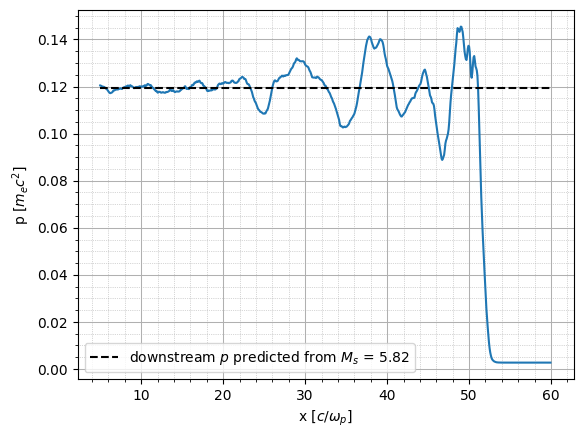

In [112]:
pressure_d = 2*e_temperature_[-1]*float(R)
print(f"predicted downstream mass density is {pressure_d}")

plt.plot(x[int(xmin/dx):int(xmax/dx)],2*e_temperature_)
plt.xlabel(r"x $[c/\omega_p]$")
plt.hlines(pressure_d,xmin=xmin,xmax=xmax, label = r"downstream $p$ predicted from $M_s$ = "+str(mach_number), color = 'black', ls = '--')
pretty_plot()
plt.ylabel(r'p $[m_e c^2]$')
plt.legend()

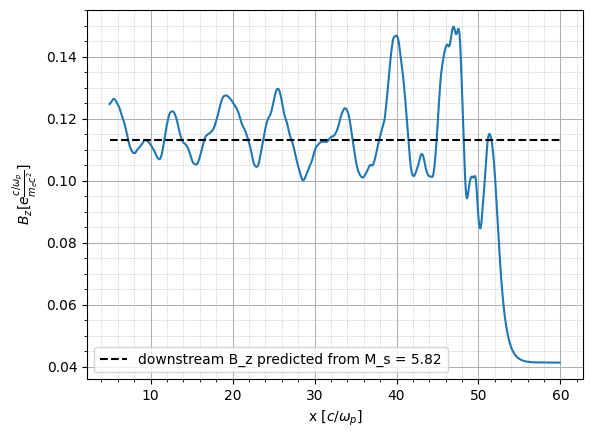

In [113]:
b_d = roots[0]*(0.04)

plt.plot(x[int(xmin/dx):int(xmax/dx)],b3_)
plt.xlabel(r"x $[c/\omega_p]$")
plt.hlines(b_d,xmin=xmin,xmax=xmax, label = f"downstream B_z predicted from M_s = {mach_number}", color = 'black', ls = '--')
pretty_plot()
plt.ylabel(r'$B_z [e \frac{c / \omega_p}{m_e c^2}]$')
plt.legend()

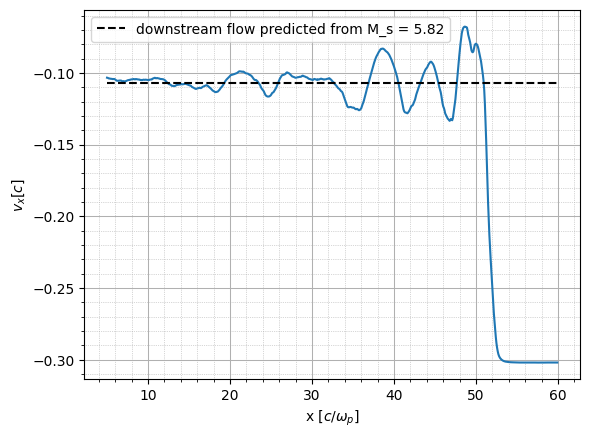

In [114]:
V_d = 1/roots[0]*(-v+e_ufl1_[-1])

plt.plot(x[int(xmin/dx):int(xmax/dx)],-v+e_ufl1_)
plt.xlabel(r"x $[c/\omega_p]$")
plt.hlines(V_d,xmin=xmin,xmax=xmax, label = f"downstream flow predicted from M_s = {mach_number}", color = 'black', ls = '--')
pretty_plot()
plt.ylabel(r'$v_x [c]$')
plt.legend()